In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [68]:
def simulate_diffusion(v, a, beta, tau, dt=1e-3, scale=1.0, max_time=10.):
    """
    Simulates one realization of the diffusion process
    """
    # start time
    steps = tau

    # track value
    value = beta * a

    # loop until decision made or time-out
    while(value < a and value > 0 and max_time > steps):
        # update value
        value += (v * dt) + (scale * np.sqrt(dt) * np.random.normal(0, 1))
        steps += dt
    
    # return decision time and decision result
    if value >= a:
        c = 1.
    else:
        c = 0.
    return (round(steps, 3), c) #, values

In [ ]:
def simulate_diffusion_n(num_sims, v, a, beta, tau, dt=1e-3, scale=1.0, max_time=10.):
    """
    Simulates num_sim realizations of the diffusion process
    """
    # track responses
    bottom_response = 0
    top_response = 0
    num_bottom = 0
    num_top = 0

    # for each sim
    for _ in range(num_sims):
        # sim diffusion
        result = simulate_diffusion(v=v, a=a , beta=beta, tau=tau, dt=dt, scale=scale, max_time=max_time)

        # track top and bottom responses
        if result[1]:
            top_response += result[0]
            num_top += 1
        else:
            bottom_response += result[0]
            num_bottom += 1

    # calculate average response time (watching for % by 0)
    if num_bottom == 0:
        mean_bottom = 0
    else:
        mean_bottom = bottom_response / num_bottom

    if num_top == 0:
        mean_top = 0
    else:
        mean_top = top_response / num_top

    return (mean_bottom, mean_top)

In [ ]:
def vary_drift(num_sims, start_v, end_v, num_v, a, beta, tau, dt=1e-3, scale=1.0, max_time=10.):
    """
    Simulates and plots the average response times for both decisions as drift is varied from start_v to end_v
    """
    # init memory
    delta_v = (end_v - start_v) / (num_v - 1)
    x_vals = np.ndarray(num_v)
    bottom_y_vals = np.ndarray(num_v)
    top_y_vals = np.ndarray(num_v)

    # find average responses for each drift rate
    for i in range(num_v):
        cur_v = start_v + (i * delta_v)
        x_vals[i] = cur_v
        result = simulate_diffusion_n(num_sims, cur_v, a, beta, tau, dt, scale, max_time)
        bottom_y_vals[i] = result[0]
        top_y_vals[i] = result[1]
    
    #print(bottom_y_vals)

    # plot the results
    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(x_vals, bottom_y_vals, color="maroon", label="bottom")
    ax.plot(x_vals, top_y_vals, color="blue", label="top")
    ax.set_xlabel('Drift Rate (units/s)')
    ax.set_ylabel('Response Time (ms)')
    ax.set_title('Effect of Drift Rate')
    ax.legend()

In [ ]:
def vary_a(num_sims, v, start_a, end_a, num_a, beta, tau, dt=1e-3, scale=1.0, max_time=10.):
    """
    Simulates and plots the average response times for both decisions as threshold is varied from start_a to end_a
    """
    # init memory
    delta_a = (end_a - start_a) / (num_a - 1)
    x_vals = np.ndarray(num_a)
    bottom_y_vals = np.ndarray(num_a)
    top_y_vals = np.ndarray(num_a)

    # find average responses for each threshold
    for i in range(num_a):
        cur_a = start_a + (i * delta_a)
        x_vals[i] = cur_a
        result = simulate_diffusion_n(num_sims, v, cur_a, beta, tau, dt, scale, max_time)
        bottom_y_vals[i] = result[0]
        top_y_vals[i] = result[1]

    # plot the results
    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(x_vals, bottom_y_vals, color="maroon", label="bottom")
    ax.plot(x_vals, top_y_vals, color="blue", label="top")
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Response Time (ms)')
    ax.set_title('Effect of Threshold')
    ax.legend()

In [ ]:
def vary_beta(num_sims, v, a, start_beta, end_beta, num_beta, tau, dt=1e-3, scale=1.0, max_time=10.):
    """
    Simulates and plots the average response times for both decisions as starting point is varied from start_beta to end_beta
    """
    # init memory
    delta_beta = (end_beta - start_beta) / (num_beta - 1)
    x_vals = np.ndarray(num_beta)
    bottom_y_vals = np.ndarray(num_beta)
    top_y_vals = np.ndarray(num_beta)

    # find average responses for each starting point
    for i in range(num_beta):
        cur_beta = start_beta + (i * delta_beta)
        x_vals[i] = cur_beta
        result = simulate_diffusion_n(num_sims, v, a, cur_beta, tau, dt, scale, max_time)
        bottom_y_vals[i] = result[0]
        top_y_vals[i] = result[1]

    # plot the results
    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(x_vals, bottom_y_vals, color="maroon", label="bottom")
    ax.plot(x_vals, top_y_vals, color="blue", label="top")
    ax.set_xlabel('Starting Point (% of range)')
    ax.set_ylabel('Response Time (ms)')
    ax.set_title('Effect of Starting Point')
    ax.legend()

In [ ]:
def vary_tau(num_sims, v, a, beta, start_tau, end_tau, num_tau, dt=1e-3, scale=1.0, max_time=10.):
    """
    Simulates and plots the average response times for both decisions as start time is varied from start_tau to end_tau
    """
    # init memory
    delta_tau = (end_tau - start_tau) / (num_tau - 1)
    x_vals = np.ndarray(num_tau)
    bottom_y_vals = np.ndarray(num_tau)
    top_y_vals = np.ndarray(num_tau)

    # find average responses for each starting time
    for i in range(num_tau):
        cur_tau = start_tau + (i * delta_tau)
        x_vals[i] = cur_tau
        result = simulate_diffusion_n(num_sims, v, a, beta, cur_tau, dt, scale, max_time)
        bottom_y_vals[i] = result[0]
        top_y_vals[i] = result[1]

    # plot the results
    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(x_vals, bottom_y_vals, color="maroon", label="bottom")
    ax.plot(x_vals, top_y_vals, color="blue", label="top")
    ax.set_xlabel('Starting Time (ms)')
    ax.set_ylabel('Response Time (ms)')
    ax.set_title('Effect of Starting Time')
    ax.legend()

In [ ]:
# experimental parameters
num_sims = 2000
num_diff = 25
v = 0.5
start_v = 0.5
end_v = 1.5
a = 5
start_a = 3
end_a = 10
beta = 0.2
start_beta = 0.05
end_beta = 0.5
tau = 0.02
start_tau = 0.0
end_tau = 1.5

[3.17679525 2.91604447 2.79273611 3.06848865 2.48349418 2.43258491
 2.39814368 2.1600518  1.93620104 1.62872895 1.51934385 1.49782069
 1.35375182 1.07758555 1.19820536 1.24459901 1.01907407 0.77161392
 0.80939024 0.97625806 0.77541803 0.72966667 0.74665    0.7176413
 0.67775294]


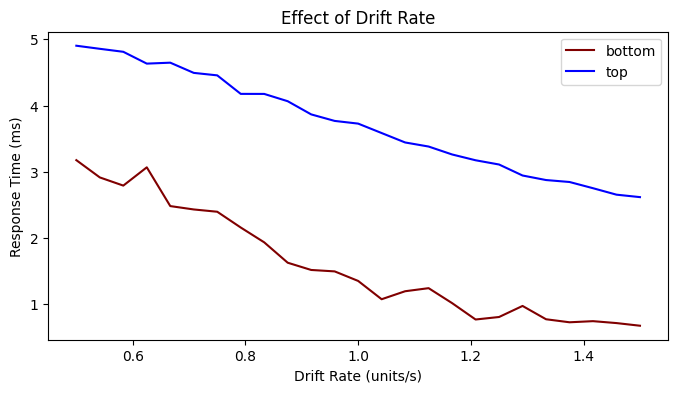

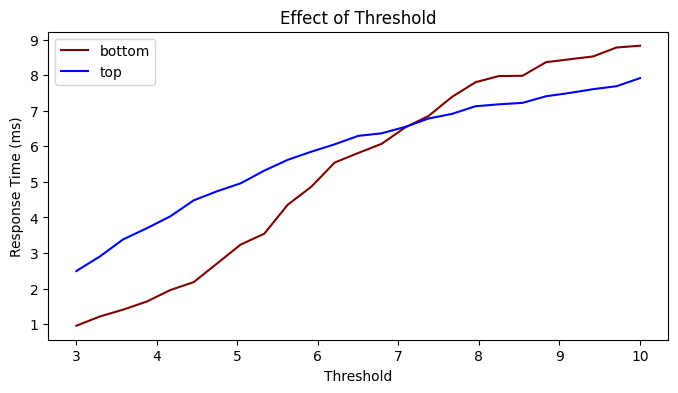

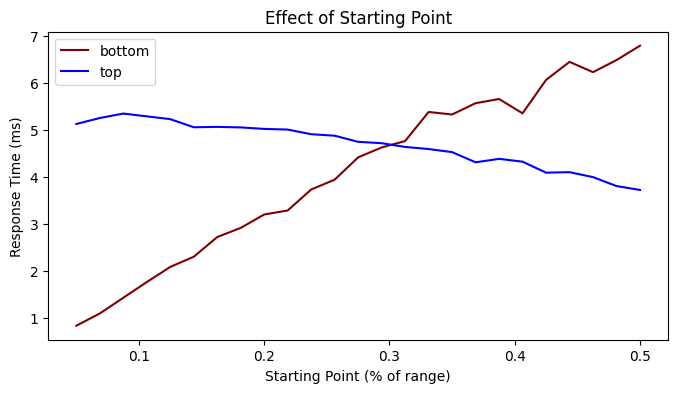

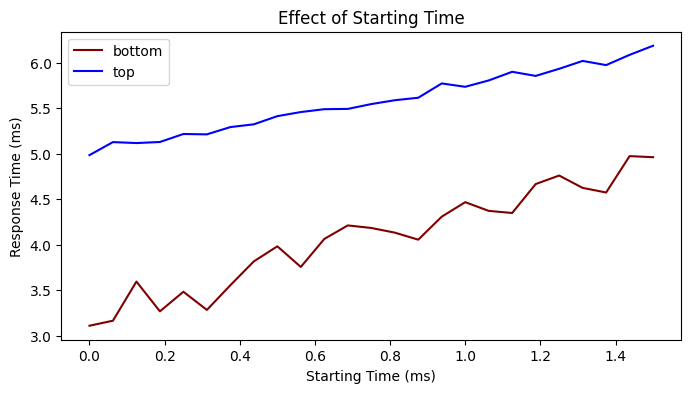

In [ ]:
# simulate and plot each varying parameter
vary_drift(num_sims, start_v, end_v, num_diff, a, beta, tau)
vary_a(num_sims, v, start_a, end_a, num_diff, beta, tau)
vary_beta(num_sims, v, a, start_beta, end_beta, num_diff, tau)
vary_tau(num_sims, v, a, beta, start_tau, end_tau, num_diff)

### Effect of Drift Rate
As drift rate (v) increases, response time for both top and bottom decrease. The evidence accumulations occurs quicker, and so the value swings more dramatically in either direction.

### Effect of Threshold
As threshold (a) increases, response time for both top and bottom increase. The threshold is moved further away, so it takes more evidence for a final decision, meaning accumulating to this point takes longer. The starting point is defined as a percentage from the bottom threshold to the top, so both top and bottom are proportionally moved away from the starting point as threshold increases.

### Effect of Starting Point
As starting point (beta) increases, response time for the top decreases, and response time for the bottom increases. As the starting point is moved toward the top, less evidence is needed to make the upper decision. Simulataneously, the starting point is moved away from the bottom, and so more evidence is needed to make the lower decision.

### Effect of Starting Time
As starting time (tau) increases, response time for the top and bottom increase. The starting time is simply an initial offset and has no impact on the drift decision time. Therefore, we can expect that the drift decision time remains approximately the same, and the total time increases as the starting offset increases.